In [ ]:
%matplotlib inline
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "DejaVu Sans"

In [ ]:
CSV_PATH = "bestsellers with categories.csv"

In [ ]:
df_raw = pd.read_csv(CSV_PATH)
print("Перші 5 рядків (raw):")
display(df_raw.head())
print("Розмір (raw).shape:", df_raw.shape)

# очікувані оригінальні назви: Name, Author, User Rating, Reviews, Price, Year, Genre
def norm(s: str) -> str:
    s = s.strip()
    s = s.replace(" ", "_").lower()
    s = re.sub(r"_+", "_", s)
    return s

df = df_raw.copy()
df.columns = [norm(c) for c in df.columns]

Перші 5 рядків (raw):


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Розмір (raw).shape: (550, 7)


In [ ]:
expected = ['name','author','user_rating','reviews','price','year','genre']
# map наявні (на випадок неідеальних назв)
rename_map = {}
for want in expected:
    if want in df.columns:
        rename_map[want] = want
    else:

        for c in df.columns:
            if want.replace("_","") == c.replace("_",""):
                rename_map[c] = want
                break
df = df.rename(columns=rename_map)
df = df[expected]

print("\nКолонки після нормалізації:", list(df.columns))


Колонки після нормалізації: ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']


In [ ]:
print("\nКількість пропусків у кожному стовпці:")
na_counts = df.isna().sum()
display(na_counts)

print("\nВідповідь: Чи є пропуски?")
print("Відповідь:", "Так" if na_counts.sum() > 0 else "Ні")


Кількість пропусків у кожному стовпці:


,0
name,0
author,0
user_rating,0
reviews,0
price,0
year,0
genre,0



Відповідь: Чи є пропуски?
Відповідь: Ні


In [ ]:
print("\nУнікальні значення genre:")
genres = df["genre"].unique().tolist()
print("Відповідь: Унікальні жанри:", genres)


Унікальні значення genre:
Відповідь: Унікальні жанри: ['Non Fiction', 'Fiction']


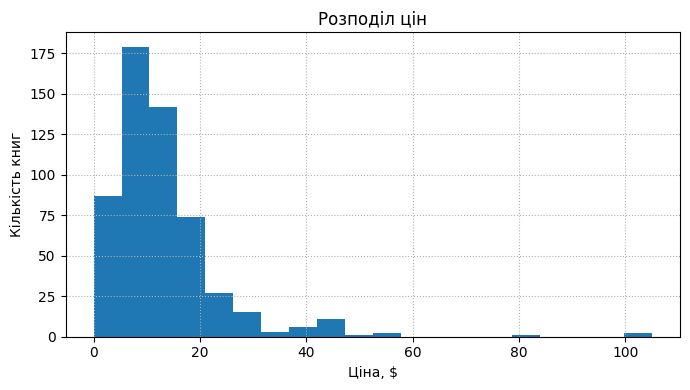

In [ ]:
plt.figure(figsize=(7,4))
df["price"].hist(bins=20)
plt.title("Розподіл цін")
plt.xlabel("Ціна, $")
plt.ylabel("Кількість книг")
plt.grid(True, linestyle=":", linewidth=.8)
plt.tight_layout()
plt.show()

In [ ]:
max_price = df["price"].max()
min_price = df["price"].min()
mean_price = df["price"].mean()
median_price = df["price"].median()
print("Відповідь: Максимальна ціна?", max_price)
print("Відповідь: Мінімальна ціна?", min_price)
print("Відповідь: Середня ціна?", round(mean_price, 2))
print("Відповідь: Медіанна ціна?", median_price)

Відповідь: Максимальна ціна? 105
Відповідь: Мінімальна ціна? 0
Відповідь: Середня ціна? 13.1
Відповідь: Медіанна ціна? 11.0


In [ ]:
print("\nРозміри датасету (shape):", df.shape)
print("Відповідь: Про скільки книг зберігає дані датасет?", df.shape[0])


Розміри датасету (shape): (550, 7)
Відповідь: Про скільки книг зберігає дані датасет? 550


In [ ]:
max_rating = df["user_rating"].max()
n_max_rating = (df["user_rating"] == max_rating).sum()
print("\nВідповідь: Який рейтинг у датасеті найвищий? Відповідь:", max_rating)
print("Відповідь: Скільки книг мають такий рейтинг? Відповідь:", n_max_rating)


Відповідь: Який рейтинг у датасеті найвищий? Відповідь: 4.9
Відповідь: Скільки книг мають такий рейтинг? Відповідь: 52


In [ ]:
idx_most_reviews = df["reviews"].idxmax()
row_most_reviews = df.loc[idx_most_reviews]
print("Відповідь: Яка книга має найбільше відгуків? Відповідь:",
      f"{row_most_reviews['name']} (автор: {row_most_reviews['author']}, reviews: {row_most_reviews['reviews']})")

Відповідь: Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing (автор: Delia Owens, reviews: 87841)


In [ ]:
df2015 = df[df["year"] == 2015]
idx_max2015 = df2015["price"].idxmax()
row_max2015 = df2015.loc[idx_max2015]
print("Відповідь: Найдорожча книга 2015 року:",
      f"{row_max2015['name']} — ${row_max2015['price']} (автор: {row_max2015['author']})")

Відповідь: Найдорожча книга 2015 року: Publication Manual of the American Psychological Association, 6th Edition — $46 (автор: American Psychological Association)


In [ ]:
n_fiction_2010 = ((df["genre"] == "Fiction") & (df["year"] == 2010)).sum()
print("Відповідь: Скільки книг жанру Fiction у 2010 році? Відповідь:", n_fiction_2010)

Відповідь: Скільки книг жанру Fiction у 2010 році? Відповідь: 20


In [ ]:
mask_years = df["year"].isin([2010, 2011])
n_49_2010_2011 = ((df["user_rating"] == 4.9) & mask_years).sum()
print("Відповідь: Скільки книг з рейтингом 4.9 у 2010 та 2011 роках? Відповідь:", n_49_2010_2011)

Відповідь: Скільки книг з рейтингом 4.9 у 2010 та 2011 роках? Відповідь: 1


In [ ]:
sub = df[(df["year"] == 2015) & (df["price"] < 8)].sort_values("price", ascending=True)
if len(sub):
    last_book = sub.iloc[-1]
    print("Відповідь: Остання (найдорожча серед дешевших 8$) у відсортованому списку 2015:", last_book["name"])
else:
    print("Відповідь: У 2015 книг дешевших за $8 не знайдено.")

Відповідь: Остання (найдорожча серед дешевших 8$) у відсортованому списку 2015: Old School (Diary of a Wimpy Kid #10)


In [ ]:
g_price = (
    df[["genre","price"]]
    .groupby("genre", as_index=False)
    .agg(max_price=("price","max"), min_price=("price","min"))
)
display(g_price)

max_fiction_price = g_price.loc[g_price["genre"]=="Fiction","max_price"].item()
min_fiction_price = g_price.loc[g_price["genre"]=="Fiction","min_price"].item()
max_non_price = g_price.loc[g_price["genre"]=="Non Fiction","max_price"].item()
min_non_price = g_price.loc[g_price["genre"]=="Non Fiction","min_price"].item()

,genre,max_price,min_price
0,Fiction,82,0
1,Non Fiction,105,0


In [ ]:

print("Відповідь: Максимальна ціна для жанру Fiction:", max_fiction_price)
print("Відповідь: Мінімальна ціна для жанру Fiction:", min_fiction_price)
print("Відповідь: Максимальна ціна для жанру Non Fiction:", max_non_price)
print("Відповідь: Мінімальна ціна для жанру Non Fiction:", min_non_price)

Відповідь: Максимальна ціна для жанру Fiction: 82
Відповідь: Мінімальна ціна для жанру Fiction: 0
Відповідь: Максимальна ціна для жанру Non Fiction: 105
Відповідь: Мінімальна ціна для жанру Non Fiction: 0


In [ ]:
books_per_author = (
    df[["author","name"]]
    .groupby("author", as_index=True)
    .agg(books=("name","count"))
)
print("\nКількість книг на автора (top 10):")
display(books_per_author.sort_values("books", ascending=False).head(10))
print("Відповідь: Розмірність таблиці 'books_per_author'?", books_per_author.shape)


Кількість книг на автора (top 10):


,books
author,
Jeff Kinney,12
Gary Chapman,11
Rick Riordan,11
Suzanne Collins,11
American Psychological Association,10
Dr. Seuss,9
Gallup,9
Rob Elliott,8
Dav Pilkey,7


Відповідь: Розмірність таблиці 'books_per_author'? (248, 1)


In [ ]:
top_author = books_per_author["books"].idxmax()
top_author_books = int(books_per_author["books"].max())
print("Відповідь: Автор з найбільшою кількістю книг:", top_author)
print("Відповідь: Скільки книг у цього автора?:", top_author_books)

Відповідь: Автор з найбільшою кількістю книг: Jeff Kinney
Відповідь: Скільки книг у цього автора?: 12


In [ ]:
rating_per_author = (
    df[["author","user_rating"]]
    .groupby("author", as_index=True)
    .agg(avg_rating=("user_rating","mean"))
)
worst_author = rating_per_author["avg_rating"].idxmin()
worst_rating = float(rating_per_author["avg_rating"].min())
print("\nВідповідь: У якого автора середній рейтинг мінімальний? Відповідь:", worst_author)
print("Відповідь: Який у цього автора середній рейтинг? Відповідь:", round(worst_rating, 3))


Відповідь: У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt
Відповідь: Який у цього автора середній рейтинг? Відповідь: 3.9


In [ ]:
author_summary = pd.concat([books_per_author, rating_per_author], axis=1)
author_summary = author_summary.sort_values(["books","avg_rating"], ascending=[True, True])
print("\nЗведена таблиця авторів (перші рядки після сортування):")
display(author_summary.head(10))


Зведена таблиця авторів (перші рядки після сортування):


,books,avg_rating
author,,
Muriel Barbery,1,4.0
Chris Cleave,1,4.1
Ian K. Smith M.D.,1,4.1
Pierre Dukan,1,4.1
Elizabeth Strout,1,4.2
Geneen Roth,1,4.2
Mark Hyman M.D.,1,4.2
Mark Twain,1,4.2
Michael Wolff,1,4.2


In [ ]:
first_author = author_summary.index[0]
print("Відповідь: Який автор перший у списку?", first_author)

Відповідь: Який автор перший у списку? Muriel Barbery


In [ ]:
df.to_csv("books_clean.csv", index=False, encoding="utf-8-sig")
g_price.to_csv("genre_price_minmax.csv", index=False, encoding="utf-8-sig")
books_per_author.reset_index().to_csv("books_per_author.csv", index=False, encoding="utf-8-sig")
rating_per_author.reset_index().to_csv("rating_per_author.csv", index=False, encoding="utf-8-sig")
author_summary.reset_index().to_csv("author_summary.csv", index=False, encoding="utf-8-sig")
print("\nЗбережено: books_clean.csv, genre_price_minmax.csv, books_per_author.csv, rating_per_author.csv, author_summary.csv")


Збережено: books_clean.csv, genre_price_minmax.csv, books_per_author.csv, rating_per_author.csv, author_summary.csv


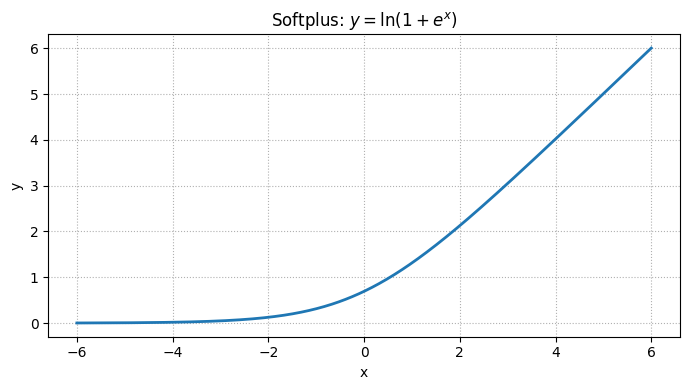

In [ ]:
x = np.linspace(-6, 6, 600); y = np.log1p(np.exp(x))
plt.figure(figsize=(7,4)); plt.plot(x,y,lw=2)
plt.title(r"Softplus: $y=\ln(1+e^x)$"); plt.grid(True, ls=":", lw=.8)
plt.xlabel("x"); plt.ylabel("y"); plt.tight_layout(); plt.show()

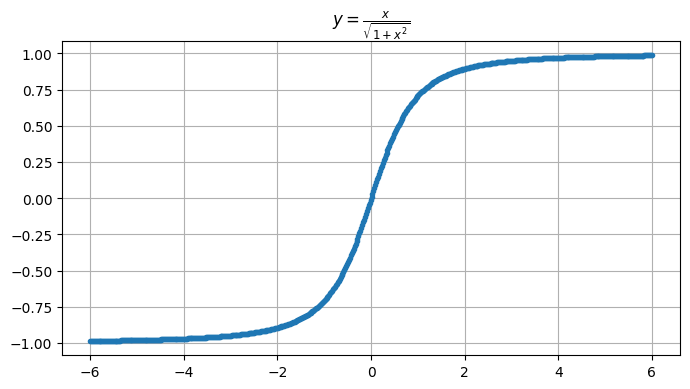

In [ ]:
x = np.linspace(-6, 6, 600); y = x / np.sqrt(1 + x**2)
plt.figure(figsize=(7,4)); plt.plot(x,y,lw=2, linestyle="--", marker=".")
plt.title(r"$y=\frac{x}{\sqrt{1+x^2}}$"); plt.grid(True); plt.tight_layout(); plt.show()

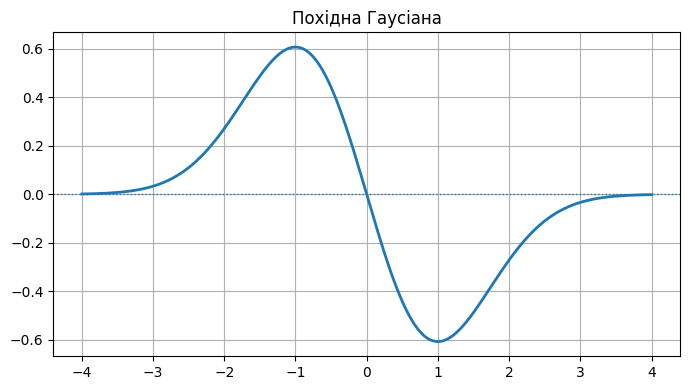

In [ ]:
x = np.linspace(-4, 4, 600); y = -x * np.exp(-x**2/2)
plt.figure(figsize=(7,4)); plt.plot(x,y,lw=2); plt.axhline(0, ls=":", lw=1)
plt.title("Похідна Гаусіана"); plt.grid(True); plt.tight_layout(); plt.show()

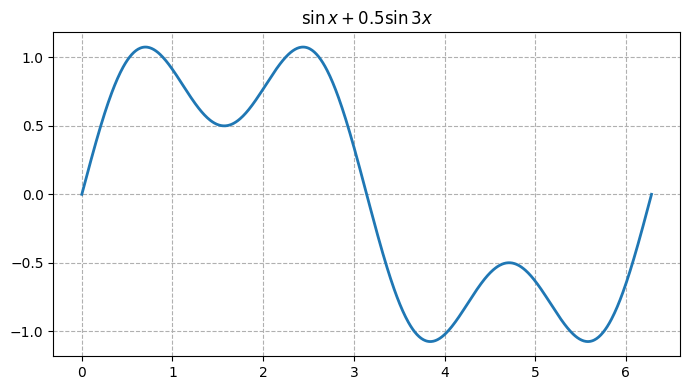

In [ ]:
x = np.linspace(0, 2*np.pi, 800); y = np.sin(x) + 0.5*np.sin(3*x)
plt.figure(figsize=(7,4)); plt.plot(x,y,lw=2); plt.title(r"$\sin x + 0.5\sin 3x$")
plt.grid(True, ls="--"); plt.tight_layout(); plt.show()

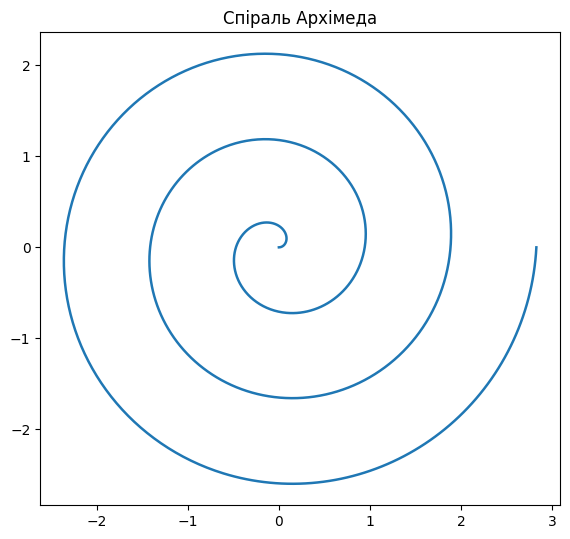

In [ ]:
theta = np.linspace(0, 6*np.pi, 1500); a, b = 0.0, 0.15
r = a + b*theta; X = r*np.cos(theta); Y = r*np.sin(theta)
plt.figure(figsize=(5.8,5.8)); plt.plot(X,Y,lw=1.8); plt.gca().set_aspect("equal","box")
plt.title("Спіраль Архімеда"); plt.tight_layout(); plt.show()